In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
X = df.drop('label', axis=1)

In [7]:
X.shape

(42000, 784)

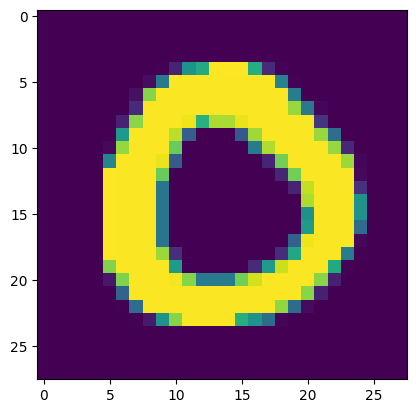

In [8]:
img = X.iloc[4].values.reshape(28,28)
plt.imshow(img)

In [9]:
X.shape

(42000, 784)

In [10]:
y = df['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=19)

In [12]:
X_train.shape

(33600, 784)

In [13]:
X.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
X_train_scaled.shape

(33600, 784)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [18]:
y_train_cat.shape

(33600, 10)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
hist = model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=64)

Epoch 1/20
525/525 [==============================] - 12s 4ms/step - loss: 0.5188 - accuracy: 0.8542
Epoch 2/20
525/525 [==============================] - 2s 3ms/step - loss: 0.2393 - accuracy: 0.9311
Epoch 3/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1926 - accuracy: 0.9442
Epoch 4/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1662 - accuracy: 0.9511
Epoch 5/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1458 - accuracy: 0.9569
Epoch 6/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1318 - accuracy: 0.9621
Epoch 7/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1195 - accuracy: 0.9650
Epoch 8/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1097 - accuracy: 0.9685
Epoch 9/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1008 - accuracy: 0.9699
Epoch 10/20
525/525 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.972

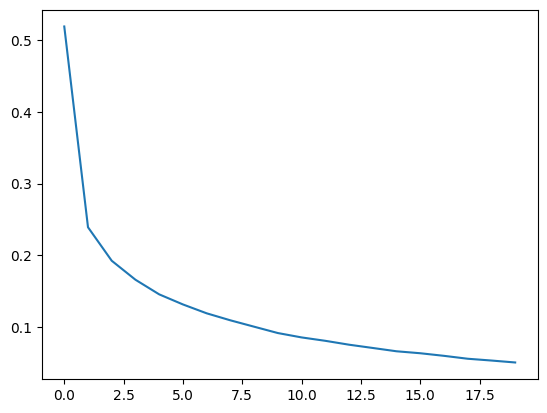

In [22]:
plt.plot(hist.history['loss'])

In [23]:
X_test_scaled.shape

(8400, 784)

In [24]:
model.evaluate(X_test_scaled,y_test_cat)

263/263 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9592


[0.160776749253273, 0.9591666460037231]

In [25]:
X_test_scaled.iloc[0:6].values.shape

(6, 784)

In [26]:
op = model.predict(X_test_scaled.iloc[0].values.reshape(1,784))

1/1 [==============================] - 0s 173ms/step


In [27]:
op.argmax(axis=1)

array([7], dtype=int64)

In [28]:
op

array([[1.4720983e-09, 1.8202294e-07, 6.3108846e-06, 4.0314947e-03,
        4.3594005e-07, 3.4070943e-06, 1.2451945e-10, 9.9209058e-01,
        6.0044206e-04, 3.2672286e-03]], dtype=float32)

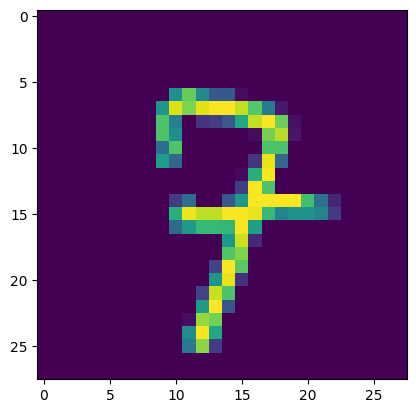

In [29]:
plt.imshow(X_test_scaled.iloc[0].values.reshape(28,28))

In [31]:
import os, cv2

In [ ]:
os.listdir('../../datasets/digit_recognition/my_images/')

In [ ]:
A = cv2.imread('../../datasets/digit_recognition/my_images/'+'0.jpg',0) # 0- read as gray scale

In [ ]:
A = cv2.resize(A,(28,28))
A.shape

In [ ]:
A = A.reshape(1,784)/255

In [ ]:
A.shape

In [ ]:
model.predict_on_batch(A).argmax()

In [ ]:
def predict(path):
    A = cv2.imread(path, 0)
    A = cv2.resize(A,(28,28))
    A = A.reshape(1,784)/255
    return model.predict_on_batch(A).argmax()

In [67]:
predict('../../datasets/digit_recognition/my_images/'+'00.jpg')

0

In [72]:
filenames = os.listdir('../../datasets/digit_recognition/my_images/')
for filename in filenames:
    print('../../datasets/digit_recognition/my_images/'+filename)

../../datasets/digit_recognition/my_images/0.jpg
../../datasets/digit_recognition/my_images/00.jpg
../../datasets/digit_recognition/my_images/1.jpg
../../datasets/digit_recognition/my_images/11.jpg
../../datasets/digit_recognition/my_images/2.jpg
../../datasets/digit_recognition/my_images/22.jpg
../../datasets/digit_recognition/my_images/3.jpg
../../datasets/digit_recognition/my_images/33.jpg
../../datasets/digit_recognition/my_images/4.jpg
../../datasets/digit_recognition/my_images/44.jpg
../../datasets/digit_recognition/my_images/5.jpg
../../datasets/digit_recognition/my_images/55.jpg
../../datasets/digit_recognition/my_images/6.jpg
../../datasets/digit_recognition/my_images/66.jpg
../../datasets/digit_recognition/my_images/7.jpg
../../datasets/digit_recognition/my_images/77.jpg
../../datasets/digit_recognition/my_images/8.jpg
../../datasets/digit_recognition/my_images/88.jpg
../../datasets/digit_recognition/my_images/9.jpg
../../datasets/digit_recognition/my_images/99.jpg


In [75]:
for filename in filenames:
    digit = predict('../../datasets/digit_recognition/my_images/'+filename)
    print(filename,'\t',digit)

0.jpg 	 4
00.jpg 	 0
1.jpg 	 5
11.jpg 	 1
2.jpg 	 3
22.jpg 	 2
3.jpg 	 3
33.jpg 	 3
4.jpg 	 4
44.jpg 	 1
5.jpg 	 8
55.jpg 	 3
6.jpg 	 5
66.jpg 	 6
7.jpg 	 2
77.jpg 	 3
8.jpg 	 8
88.jpg 	 3
9.jpg 	 1
99.jpg 	 3


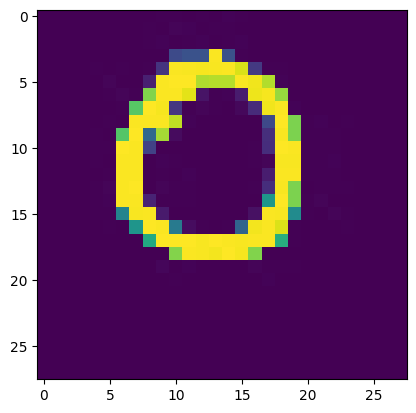

In [78]:
plt.imshow(A.reshape(28,28))